# Projeto-Lello Imóveis


# Análise do preço de aparmentos São paulo pelo site lello Imóveis 


Alunos:

<li>Gabriel de Araújo Alves 
<li>Ricardo Mourão
<li>Ykaro Andrade



## 1. Introdução

### 1.1 Como verificar o preço?

<ul>Sabemos que o setor imobiliário é um setor muito procurado ao longo dos anos e atualmente.Por isso, primeiro é necessário, a partir do site do quinto andar, e,considerando apartamentos da cidade de São Paulo, podemos traçar uma estimativa de preços médios de apartamentos ou casas considerando alguns fatores como:<ul/>
        <li> Área da casa ou apartamento
        <li> Número de quartos 
        <li> Bairro
        <li> rua  

### 1.2 Importando Bibliotecas necessárias

In [6]:

%matplotlib inline
import math
import os
import seaborn as sns
import matplotlib as plt
import numpy as np
from numpy import arange
import pandas as pd
from random import randint
# Remove warnings
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML  # Para ter melhor print.
from math import *
# para nos comunicarmos com a Web
import requests

# para extrair informações de páginas HTML
import bs4
from bs4 import BeautifulSoup


# Modelos preditivos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Módulos complementares para os modelos preditivos
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

import time

import plotly.express as px

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


### 1.3 Extração de Dados

### 1.3.1 Definindo cabeçalho User-Agent

In [7]:
headers = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})

### 1.3.2 Definindo Url de Busca

In [8]:
url = 'https://www.lelloimoveis.com.br/venda/residencial/1-pagina/'#apenas primeira página

### 1.3.3 Utilizando *requests* para baixar a página do Lello Imóveis

Com o uso da biblioteca **requests**, podemos obter o **HTML** das páginas da LelloImóveis.

In [9]:
url = 'https://www.lelloimoveis.com.br/venda/residencial/1-pagina/'#considerando só a primeira página
resposta = requests.get(url = url, headers=headers)
resposta.json

resposta.encoding = 'utf-8'

# resposta.text

In [10]:
soup = BeautifulSoup(resposta.text, 'html.parser')

### 1.3.4-Considerando apenas a 1° página como exemplo

In [11]:
url = 'https://www.lelloimoveis.com.br/venda/residencial/1-pagina/'
resposta = requests.get(url = url, headers=headers)

ap = "card-body"  # Há no total 24 objetos com essa classe, mas os 12 primeiros são idênticos aos 12 últimos


lista_total = []
lista_aps = soup.find_all(class_=ap, limit=12)
lista_total.append(lista_aps)
print(len(lista_total)) #lista_total tem uma lista com os 12 elementos

1


### 1.3.5-Pegando todas as páginas de apartamentos

In [12]:
lista_total = []
for i in range(1,100):
    url = 'https://www.lelloimoveis.com.br/venda/residencial/{}-pagina/'.format(i)
    resposta = requests.get(url = url, headers=headers)
    soup = BeautifulSoup(resposta.content, 'html.parser')
    lista_aps = soup.find_all(class_=ap, limit=12)
    lista_total.append(lista_aps)

### 1.3.6-Para cada página podemos achar todos os apartamentos 

In [13]:
flat_list = [item for sublist in lista_total for item in sublist]  # todos os elementos encontrados individualmente


### 1.3.7-Função para criação de dataFrame com informações relevantes e limpeza de dados

In [30]:
def data(lista):
    #listas necessárias
    lista_tipo=[]
    lista_rua=[]
    lista_bairro=[]
    lista_area=[]
    lista_quartos=[]
    lista_vagas=[]
    lista_banheiros=[]
    lista_aluguel_total=[]
    


    for i in range(0, len(lista)):
        ap = lista[i] #procura cada lista de apartamentos
        #tipo do ap
        tipo=ap.find('div',attrs={'class': "card-title h5"}).text
        lista_tipo.append(tipo)
        #rua
        rua=ap.find('p',attrs={'class': "text-truncate mb-0"}).text
        lista_rua.append(rua)
        #bairro
        bairro=ap.find('span',attrs={'class': "card-text-neighborhood mt-1 text-truncate"}).text.split(',')[0]
        lista_bairro.append(bairro)
        #area do ap
        area=ap.find('span',attrs={'class': "tagItemstyle__TagValue-sc-13sggff-3 edPntf"})
        if area==None:
            area=0
        else:
            area=int(ap.find('span',attrs={'class': "tagItemstyle__TagValue-sc-13sggff-3 edPntf"}).text.split("m²")[0])
        lista_area.append(area)
        
        #numero de quartos
        quartos=ap.find('span',attrs={'class': "tagItemstyle__ComplementValue-sc-13sggff-4 hERajv ml-0"})
        if quartos==None:
            quartos=0            
        else:
            quartos=int(ap.find('span',attrs={'class': "tagItemstyle__ComplementValue-sc-13sggff-4 hERajv ml-0"}).text.split(" ")[0])
        lista_quartos.append(quartos)
        #numero de vagas de carro
        vagas_carro=ap.find('span',attrs={'data-testid': "realty-parking-lot-quantity"})
        if vagas_carro==None:
            vagas_carro=0
        else:
            vagas_carro=int(ap.find('span',attrs={'data-testid': "realty-parking-lot-quantity"}).text.split("Garagens")[0])
        lista_vagas.append(vagas_carro)
        
        #numero de banheiros
        banheiros=ap.find('span',attrs={'data-testid':"realty-bathroom-quantity"})
        if banheiros==None:
            banheiros=0
        else:                
            banheiros=int(ap.find('span',attrs={'data-testid':"realty-bathroom-quantity"}).text.split("Banheiros")[0])
        lista_banheiros.append(banheiros)
        #valor do aluguel
        aluguel=ap.find('p',attrs={'class':"mb-0 font-weight-bold"})
        if aluguel==None:
            aluguel=0
        else:
            aluguel=int(ap.find('p',attrs={'class':"mb-0 font-weight-bold"}).text.split("R$")[1].replace(",",""))
        lista_aluguel_total.append(aluguel)
    
    df = pd.DataFrame({'Tipo': lista_tipo,
                   'Rua': lista_rua,
                   'Bairro': lista_bairro,
                   'Área': lista_area,
                   'Quartos':lista_quartos,
                    'Vagas':lista_vagas,
                    'Banheiros':lista_banheiros,
                   'Preco':lista_aluguel_total
                  })
        
    return df



### 1.3.9 Criando Dataframe com dados limpos

In [31]:
frame=data(flat_list)
frame.head(5)

,Tipo,Rua,Bairro,Área,Quartos,Vagas,Banheiros,Preco
0,Apartamento,Rua dos Capitães Mores,Mooca,87,3,2,2,620000
1,Apartamento,Rua Dias Leme,Mooca,79,2,1,1,560000
2,Apartamento,Rua do Orfanato,Vila Prudente,59,2,1,1,460000
3,Apartamento,Rua Álvares de Azevedo,Centro,133,3,1,2,550000
4,Apartamento,Rua Dianópolis,Parque da Mooca,43,2,1,1,320000


## 2 Análise de Dados

### 2.1 Verificação de Dados nulos na base

É sempre importante verificar os dados da base, de maneira que, se houverem dados nulos podemos substitui-los de acordo com o tipo de variável.Desse modo,se houver alguma variável numérica com valores nulos, neste caso houve substituição por 0. No entanto, poderíamos trocar pela média dos valores daquela coluna do dataframe

<AxesSubplot:>

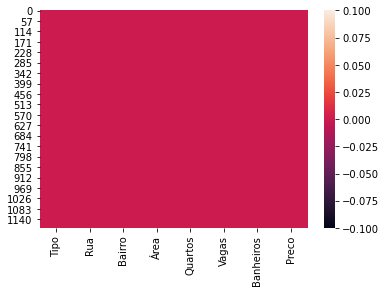

In [32]:
#utilização do heatmap para verificar dados nulos
sns.heatmap(frame.isnull())

### 2.2-Análise prévia das variáveis numéricas

Inicialmente é preferível entender quais os principais valores de média, mediana, contagem entre outros para as variáveis numéricas presentes no nosso dataframe

In [33]:
frame.describe().round (decimals = 2)#considera-se somente as variáveis numéricas 

,Área,Quartos,Vagas,Banheiros,Preco
count,1188.00,1188.00,1188.00,1188.00,1188.00
mean,74.42,2.30,1.14,1.45,511048.44
std,26.17,0.62,0.54,0.60,203319.40
min,20.00,0.00,0.00,0.00,300000.00
25%,57.00,2.00,1.00,1.00,369750.00
50%,68.00,2.00,1.00,1.00,430000.00
75%,87.00,3.00,1.00,2.00,585250.00
max,260.00,4.00,3.00,4.00,999000.00


<ul>Por meio do comando describe alguma informações relevantes são mostradas para o dataframe análisado.<ul/>
    <li>-Área :Á área média para um apartamento, considerando esta corretora,é de $74.5 m^{2}$,bem como há um minímo de $20m^{2}$ e máximo de $260 m^{2}$  <li/>
    <li>-Quartos : Para os quartos consideramos como $2.3$ á média de quartos para um apartamento mesmo sabendo que os números de quartos são inteiros
    <li>-Vagas : Para as vagas de carros há a consideração de $1.14$ como á média para as vagas de carros para um apartamento mesmo sabendo que os números de vagas de carros também são inteiros
    <li>-Banheiros :Para os banheiros consideramos como $1.45$ á média de banheiros para um apartamento mesmo sabendo que os números de banheiros são inteiros
    <li>-Preço de Venda : Em relação ao preço de venda há de se perceber que, considerando os 1188 apartamentos análisados, o Preço médio do apartamento está da faixa de $511375.80$ . Além disso, os valores mínimos e máximos encontrados foram de $300000$ e $999000$,respectivamente.

### 2.3-Análise do Preço de Venda em relação as outras variáveis numéricas

#### 2.3.1-Análise gráfica

In [35]:
# análise interativa das variáveis categóricas
@interact(categorias=sorted(["Área","Quartos","Vagas","Banheiros"]),
                            nomes=["Área do apartamento","número de quartos","número de Vagas","número de Banheiros"])

def grafico_numericas(categorias,nomes):
    fig  = px.scatter(frame, x = frame[categorias], y = 'Preco', log_x = True, width = 800)
    fig.update_traces(marker = dict(size = 12, line=dict(width = len(categorias))), selector = dict(mode = 'markers'))
    fig.update_layout(title = f'{nomes} X Preco')
    fig.update_xaxes(title = f'{nomes}')
    fig.update_yaxes(title = 'Preco')
    fig.show()
       


interactive(children=(Dropdown(description='categorias', options=('Banheiros', 'Quartos', 'Vagas', 'Área'), va…

<ul>Por meio da interatividade conseguimos entender graficamente o comportamento das variáveis numéricas em relação ao preço de venda de um apartamento qualquer<ul/>
    <li>-Área :Em relação a área o comportamento do gráfico é bem disperso, por este motivo, a análise gráfica por si só não contribui para um detalhamento maior dessa variável.  
    <li>-Quartos : Para os quartos é perceptível notar uma maior quantidade de apartamentos com 2 ou 3 quartos.Além disso,há um gap de valores entre $700000$ e $800000$ para os apartamentos independente do número de quartos
    <li>-Vagas : Para as vagas de carros há a consideração de valores para 1 ou 2 vagas como valores majoritários.Dessa forma, a minoria dos apartamentos possui 3 vagas de carro. 
    <li>-Banheiros :Em relação aos banheiros há um comportamento parecido,a maioria deles possui 1 ou 2 banheiros.Nesse contexto, observa-se também um gap entre os valores descritos para os quartos. 
    

### 2.4 Análise por meio da correlação

In [36]:
#identificacao da correlacao entre o Preço de Venda e as outras vairaveis numericas
frame.corr().round (decimals = 2)

,Área,Quartos,Vagas,Banheiros,Preco
Área,1.00,0.56,0.24,0.42,0.52
Quartos,0.56,1.00,0.30,0.41,0.27
Vagas,0.24,0.30,1.00,0.37,0.36
Banheiros,0.42,0.41,0.37,1.00,0.39
Preco,0.52,0.27,0.36,0.39,1.00


<AxesSubplot:>

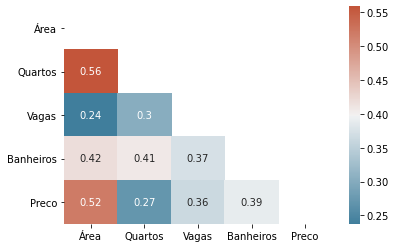

In [37]:
#2° abordadagem
#variáveis necesssárias
corr=frame.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#correlação
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)


Pode-se também fazer uma abordagem analítica com relação ao gráfico de correlações entre as variáveis.Dessa maneira, a correlação do preço de venda com as demais variáveis é média ou baixa(abaixo $0.7$).Logo, supõe-se que as variáveis apresentadas podem não conseguir se relacionar da melhor forma com o Preço de Venda de um determinado apartamento. 

### 2.5 Considerando Banheiros ,Vagas ,Quartos como variáveis categóricas

#### 2.5.1 Introduzindo outra variável considerando o Preço de Venda do imóvel por intervalos

In [42]:
frame1=frame['Preco'].sort_values()
preco_mod=pd.cut(frame1,8)
frame['Preco_mod']=preco_mod


#### 2.5.2 Análise por tabela cruzada e gráfica

In [45]:
# análise interativa das variáveis categóricas
@interact(categorias=sorted(['Quartos', 'Vagas', 'Banheiros']))
#função que faz a tabela_cruzada bem como o gráfico barplot para as categóricas
def tabela_cruzada(categorias):
    tabela=pd.crosstab(index=preco_mod,columns=frame[categorias],normalize='index').round(decimals=4)*100
    display(HTML(tabela.to_html()))
    sns.catplot(x=categorias, y="Preco_mod",
            kind="box", dodge=False, data=frame)


interactive(children=(Dropdown(description='categorias', options=('Banheiros', 'Quartos', 'Vagas'), value='Ban…

As informaçõe anteriores corroboram o gráfico acima!

## 2.6- Abordagem considerando preço médio para os bairros

Neste caso, pode-se análisar também a variável Bairro que ,por não ser numérica , ficou de fora das outras abordagens

### 2.6.1- Preço médio para os 5 bairros mais baratos


In [55]:
df1 = frame.groupby(['Bairro']).agg({'Preco': 'mean'}).reset_index()
precos_mais_baratos = list(df1.sort_values(by='Preco',ascending=True).head(5)['Preco'])
bairros_mais_baratos = list(df1.sort_values(by='Preco',ascending=True).head(5)['Bairro'])


Text(0, 0.5, 'Preços')

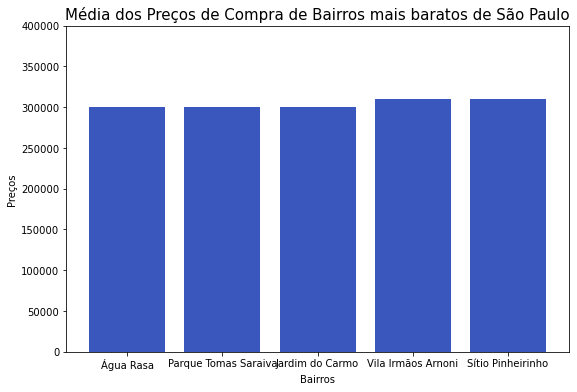

In [90]:
import matplotlib.pyplot as plt 
import numpy as np 
plt.figure(figsize=(9,6))
parameters = {'axes.labelsize': 10,
        'axes.titlesize': 15}
plt.rcParams.update(parameters)
plt.ylim(0,400000)
plt.title('Média dos Preços de Compra de Bairros mais baratos de São Paulo')
plt.bar(bairros_mais_baratos,precos_mais_baratos, color='#3957bd')
plt.xlabel('Bairros')
plt.ylabel('Preços')


### 2.6.2- Preço médio para os 5 bairros mais caros


In [59]:
df1 = frame.groupby(['Bairro']).agg({'Preco': 'mean'}).reset_index()
precos_mais_caros = list(df1.sort_values(by='Preco',ascending=False).head(5)['Preco'])
bairros_mais_caros = list(df1.sort_values(by='Preco',ascending=False).head(5)['Bairro'])


[990000.0, 980000.0, 965000.0, 960000.0, 950000.0]

Text(0, 0.5, 'Preços')

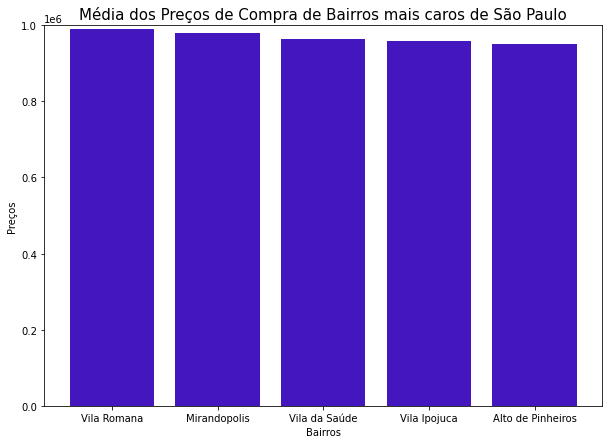

In [66]:
import matplotlib.pyplot as plt 
import numpy as np 
plt.figure(figsize=(10,7))
parameters = {'axes.labelsize': 10,
        'axes.titlesize': 15}
plt.rcParams.update(parameters)
plt.ylim(0,1000000)
plt.title('Média dos Preços de Compra de Bairros mais caros de São Paulo')
plt.bar(bairros_mais_caros,precos_mais_caros, color='#4317bd')
plt.xlabel('Bairros')
plt.ylabel('Preços')

### 2.6.3-Lista de Preços bairros caros

In [98]:
print(f'Esses são os apartamentos mais caros de São Paulo(em R$) :{precos_mais_caros}')
print(f'Esses são os bairros mais caros de São Paulo(em R$) :{bairros_mais_caros}')

Esses são os apartamentos mais caros de São Paulo(em R$) :[990000.0, 980000.0, 965000.0, 960000.0, 950000.0]
Esses são os bairros mais caros de São Paulo(em R$) :['Vila Romana', 'Mirandopolis', 'Vila da Saúde', 'Vila Ipojuca', 'Alto de Pinheiros']


### 2.6.4-Lista de Preços bairros baratos

In [99]:
print(f'Esses são os apartamentos mais caros de São Paulo(em R$) :{precos_mais_baratos}')
print(f'Esses são os bairros mais caros de São Paulo(em R$) :{bairros_mais_baratos}')

Esses são os apartamentos mais caros de São Paulo(em R$) :[300000.0, 300000.0, 300000.0, 310000.0, 310000.0]
Esses são os bairros mais caros de São Paulo(em R$) :['Água Rasa', 'Parque Tomas Saraiva', 'Jardim do Carmo', 'Vila Irmãos Arnoni', 'Sítio Pinheirinho']


## 2.7- Abordagem considerando preço médio para as ruas

### 2.7.1- Preço médio para as 5 ruas mais baratas


In [83]:
df1 = frame.groupby(['Rua']).agg({'Preco': 'mean'}).reset_index()
precos_rua_mais_baratos = list(df1.sort_values(by='Preco',ascending=True).head(5)['Preco'])
ruas_mais_baratas = list(df1.sort_values(by='Preco',ascending=True).head(5)['Rua'])


Text(0, 0.5, 'Preços')

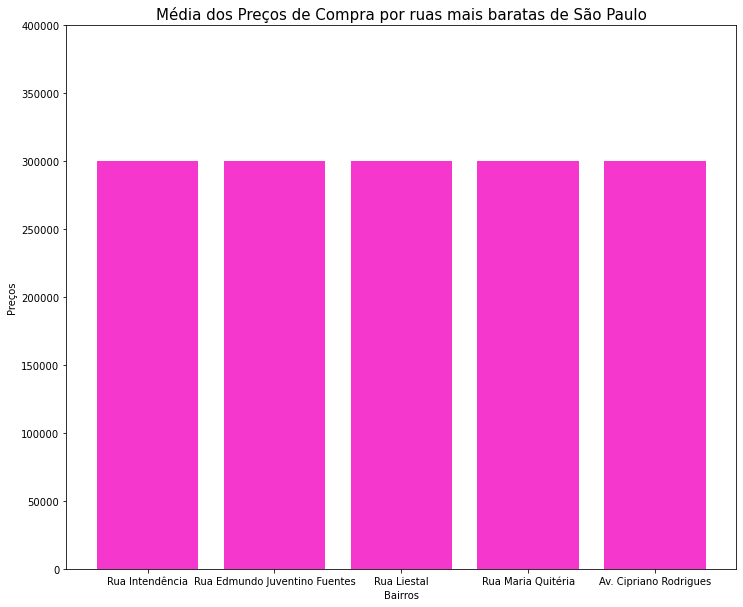

In [89]:
import matplotlib.pyplot as plt 
import numpy as np 
plt.figure(figsize=(12,10))
parameters = {'axes.labelsize': 10,
        'axes.titlesize': 15}
plt.rcParams.update(parameters)
plt.ylim(0,400000)
plt.title('Média dos Preços de Compra por ruas mais baratas de São Paulo')
plt.bar(ruas_mais_baratas,precos_rua_mais_baratos, color='#F537cd')
plt.xlabel('Bairros')
plt.ylabel('Preços')

### 2.7.2- Preço médio para as 5 ruas mais caras

In [85]:
df1 = frame.groupby(['Rua']).agg({'Preco': 'mean'}).reset_index()
precos_rua_mais_caros = list(df1.sort_values(by='Preco',ascending=False).head(5)['Preco'])
ruas_mais_caras = list(df1.sort_values(by='Preco',ascending=False).head(5)['Rua'])

Text(0, 0.5, 'Preços')

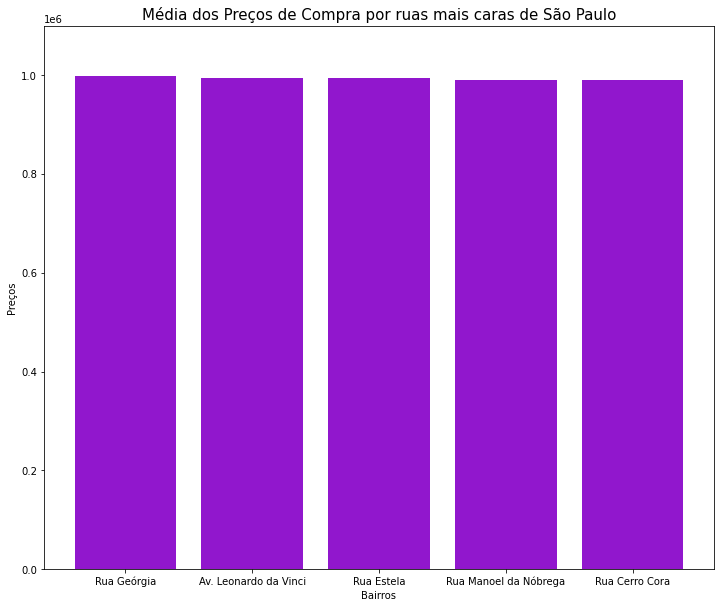

In [88]:
import matplotlib.pyplot as plt 
import numpy as np 
plt.figure(figsize=(12,10))
parameters = {'axes.labelsize': 10,
        'axes.titlesize': 15}
plt.rcParams.update(parameters)
plt.ylim(0,1100000)
plt.title('Média dos Preços de Compra por ruas mais caras de São Paulo')
plt.bar(ruas_mais_caras,precos_rua_mais_caros, color='#9117cd')
plt.xlabel('Bairros')
plt.ylabel('Preços')